# **APIs**

In [18]:
import numpy  as np
import pandas as pd
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import matplotlib.pyplot as plt

In [4]:
nba_teams = teams.get_teams()
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [5]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = { key:[] for key in keys }
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

dict_nba_team = one_dict(nba_teams)  

In [10]:
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [14]:
df_warriors = df_teams[df_teams['nickname'] == 'Warriors']
id_warriors = df_warriors[['id']].values[0][0]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [16]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)
gamefinder

In [17]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,1522300039,2023-07-12,GSW @ DAL,L,217,96,...,0.771,14.0,37.0,51.0,21,3,2,17,33,-2.0
1,22023,1610612744,GSW,Golden State Warriors,1522300024,2023-07-09,GSW vs. NOP,L,201,86,...,0.839,8.0,28.0,36.0,17,4,0,15,29,-10.6
2,22023,1610612744,GSW,Golden State Warriors,1522300008,2023-07-07,GSW @ LAL,L,200,96,...,0.600,15.0,31.0,46.0,24,6,4,18,27,-5.8
3,22023,1610612744,GSW,Golden State Warriors,1322300004,2023-07-05,GSW @ CHA,W,200,98,...,0.571,13.0,28.0,41.0,21,10,3,17,22,17.2
4,22023,1610612744,GSW,Golden State Warriors,1322300003,2023-07-03,GSW @ SAC,L,201,94,...,0.824,7.0,23.0,30.0,23,3,2,17,26,-9.2


In [19]:
games_home = games [games['MATCHUP'] == 'GSW vs. TOR']
games_away = games [games['MATCHUP'] == 'GSW @ TOR']

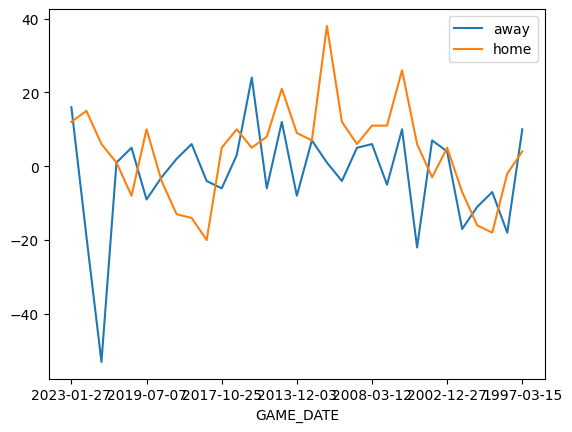

In [20]:
fig, ax = plt.subplots()
games_away.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
games_home.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)

ax.legend(['away', 'home'])
plt.show()